In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [3]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
from scipy.misc import imread

In [4]:
from six.moves import cPickle as pickle
import platform

In [5]:
def load_pickle(f):
    return pickle.load(f, encoding = 'latin1')

In [6]:
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

In [7]:
def load_CIFAR10():
    xs = []
    ys = []
    root = 'C:\\Users\\Abarn\\Documents\\assignment1\\cs231n\\datasets\\cifar-10-batches-py'
    for b in range(1,6):
        f = os.path.join(root, 'data_batch_%d'%(b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(root,'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [8]:
import os
X_train, y_train, X_test, y_test = load_CIFAR10()

In [9]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


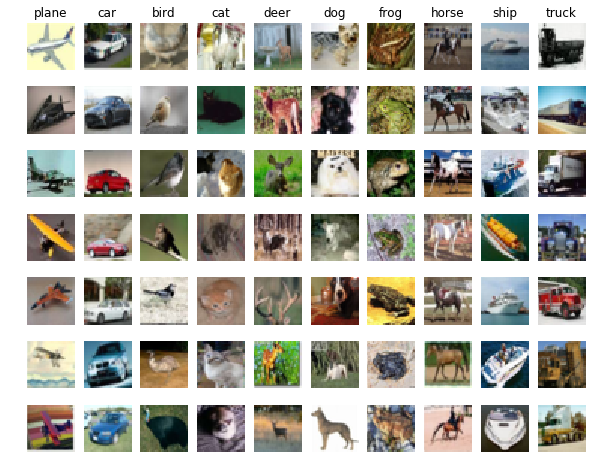

In [10]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [11]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [76]:
from collections import Counter
class KNN(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X, k=1, num_loops = 0):
        if num_loops == 0:
            dists = self.compute_distances_no_loop(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loop(X)
        else:
            raise ValueError('Invalid value %d for num_loops' %numm_loops)
        return self.predict_labels(dists, k = k)
    
    def compute_distances_two_loop(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i, j] = np.linalg.norm(X[i] - self.X_train[j]) #np.sqrt(sum((X[i]-self.X_train[j])**2))
        return dists
    
    def compute_distances_one_loop(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            dists[i, :] = np.linalg.norm(X[i] - self.X_train, axis = -1) #np.sqrt(np.sum((self.X_train.T - X[i])**2))
        return dists
    
    def compute_distances_no_loop(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt(np.sum(X**2, axis = 1).reshape(num_test,1) + np.sum(self.X_train**2, axis = 1)- 2*np.dot(X, self.X_train.T))#np.linalg.norm(X - self.X_train)
        return dists
    
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            idx_k = np.argsort(dists[i])[:k]
            closest_y = self.y_train[idx_k]
            y_pred[i] = Counter(closest_y).most_common()[0][0]
        return y_pred
            
            

In [77]:
classifier = KNN()
classifier.train(X_train, y_train)

In [71]:
dists = classifier.compute_distances_one_loop(X_test)
dists2 = classifier.compute_distances_two_loop(X_test)

(500, 5000)


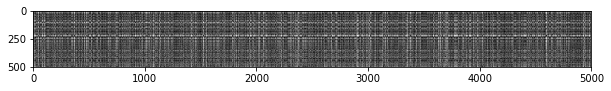

In [49]:
print(dists.shape)
plt.imshow(dists,interpolation = 'none')
plt.show()

(500, 5000)


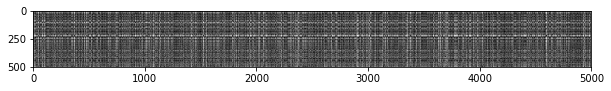

In [50]:
print(dists2.shape)
plt.imshow(dists2, interpolation = 'none')
plt.show()

In [66]:
dists3 = classifier.compute_distances_no_loop(X_test)

(500, 5000)


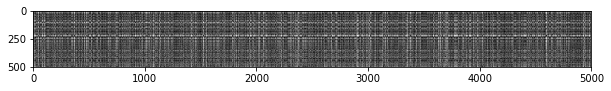

In [67]:
print(dists3.shape)
plt.imshow(dists3, interpolation = 'none')
plt.show()

In [78]:
dists = classifier.compute_distances_one_loop(X_test)
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct)/num_test
print("accuracy::%f"%accuracy)

accuracy::0.274000


In [80]:
difference = np.linalg.norm(dists - dists2, ord = 'fro')
print('Difference::%f'%difference)
if difference < 0.001:
    print("The distance matrices are same")
else:
    print("The distance matrices are different")

Difference::0.000000
The distance matrices are same


In [81]:
difference = np.linalg.norm(dists3 - dists2, ord = 'fro')
print('Difference::%f'%difference)
if difference < 0.001:
    print("The distance matrices are same")
else:
    print("The distance matrices are different")

Difference::0.000000
The distance matrices are same


In [82]:
def time_function(f, *args):
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc-tic

two_loop_time = time_function(classifier.compute_distances_two_loop, X_test)
print("Two loop version took: %f"%two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print("One loop version took: %f"%one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loop, X_test)
print("No loop version took: %f"%no_loop_time)

Two loop version took: 27.760997
One loop version took: 90.689446
No loop version took: 0.605307


In [99]:
num_folds = 5
k_choice = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

k_to_accuracies = {}
num_split = X_train.shape[0]/num_folds
accuracy_k = np.zeros((len(k_choice), num_folds), dtype = np.float)

for i in range(len(k_choice)):
    for j in range(num_folds):
        train_set = np.concatenate((X_train_folds[:j] + X_train_folds[j+1:]))
        label_set = np.concatenate((y_train_folds[:j] + y_train_folds[j+1:]))
        classifier.train(train_set, label_set)
        y_pred_fold_j = classifier.predict(X_train_folds[j], k=k_choice[i], num_loops = 0)
        num_correct = np.sum(y_pred_fold_j == y_train_folds[j])
        accuracy_k[i, j] = float(num_correct)/ num_split
    k_to_accuracies[k_choice[i]] = accuracy_k[i]
    

TypeError: only length-1 arrays can be converted to Python scalars

In [101]:
for key in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[key]:
        print("k = %d, accuracy = %f"%(key, accuracy))

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.241000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.243000
k = 3, accuracy = 0.273000
k = 3, accuracy = 0.264000
k = 5, accuracy = 0.258000
k = 5, accuracy = 0.273000
k = 5, accuracy = 0.281000
k = 5, accuracy = 0.290000
k = 5, accuracy = 0.272000
k = 8, accuracy = 0.263000
k = 8, accuracy = 0.288000
k = 8, accuracy = 0.278000
k = 8, accuracy = 0.285000
k = 8, accuracy = 0.277000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.278000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.286000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.294000
k = 12, accuracy = 0.281000
k = 12, accuracy = 0.282000
k = 12, accuracy = 0.281000
k = 15, accuracy = 0.255000
k = 15, accuracy = 0.290000
k = 15, accuracy = 0.281000
k = 15, accuracy = 0.281000
k = 15, accuracy = 0.276000
k = 20, accuracy = 0.270000
k = 20, accu

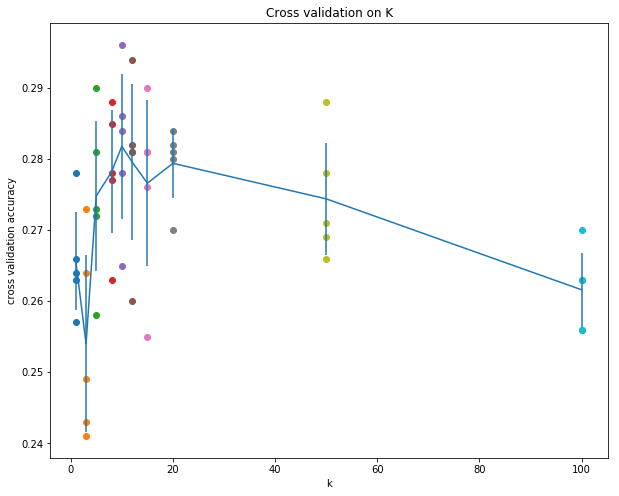

In [108]:
for k in k_choice:
    accuracies = k_to_accuracies[k]
    plt.scatter([k]*len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(val) for key,val in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(val) for key,val in sorted(k_to_accuracies.items())])
plt.errorbar(k_choice, accuracies_mean, yerr = accuracies_std)
plt.title("Cross validation on K")
plt.xlabel("k")
plt.ylabel("cross validation accuracy")
plt.show()

In [109]:
best_k = 10

classifier = KNN()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k =  best_k)

num_correct = np.sum(y_test_pred == y_test)
accuracy = num_correct/num_test
print("accuracy::%f"%accuracy)

accuracy::0.278000
